In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
orders = pd.read_csv('/datasets/orders_log.csv')

## Метрики продукта

In [4]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
Uid          358532 non-null uint64
Device       358532 non-null object
End Ts       358532 non-null object
Source Id    358532 non-null int64
Start Ts     358532 non-null object
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Uid,Device,End Ts,Source Id,Start Ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


In [5]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%d.%m.%Y %H:%M')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%d.%m.%Y %H:%M')

In [6]:
visits = visits[['Uid', 'Device', 'Source Id', 'Start Ts', 'End Ts']]
visits.columns = ['uid', 'device', 'source_id', 'start_ts', 'end_ts']

In [7]:
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.week
visits['day_of_week'] = visits['start_ts'].dt.dayofweek
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['year'] = visits['start_ts'].dt.year

__Сколько людей пользуются приложение в день / неделю / месяц?__

In [8]:
visits_av_day = visits.groupby('date').agg({'uid': 'nunique'})
visits_dau = int(visits_av_day.mean().round(0))
print('Среднее количество уникальных сессий в день: ', visits_dau)

Среднее количество уникальных сессий в день:  908


In [9]:
visits_av_day_device = visits.pivot_table(index='date', columns = 'device', values='uid', aggfunc='nunique')
visits_av_day_device.columns=['desktop_users', 'touch_users']
print('Среднее количество уникальных сессий в день на компьютерах: ', \
      int(visits_av_day_device['desktop_users'].mean().round()))
print('Среднее количество уникальных сессий в день на карманных устройствах: ', \
      int(visits_av_day_device['touch_users'].mean().round()))

Среднее количество уникальных сессий в день на компьютерах:  659
Среднее количество уникальных сессий в день на карманных устройствах:  253


Я подумала, что будет интересным посмотреть, __сколько людей пользуются приложением в разные дни недели.__

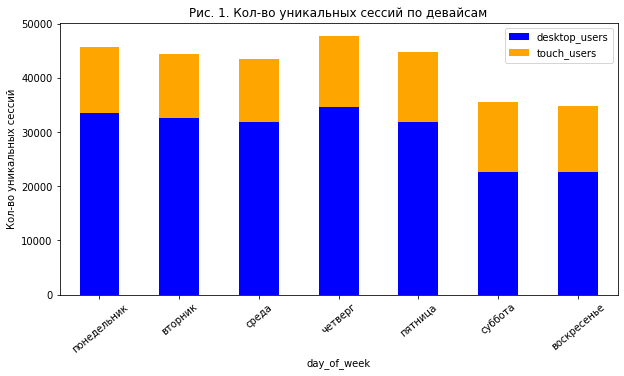

In [10]:
visits_av_dayofweek_device = visits.pivot_table(index='day_of_week', columns = 'device', values='uid', aggfunc='nunique')
visits_av_dayofweek_device.columns=['desktop_users', 'touch_users']
p1 = visits_av_dayofweek_device['desktop_users'].plot(kind='bar', color='blue', figsize=(10,5))
p2 = visits_av_dayofweek_device['touch_users'].plot(
    kind='bar', bottom=visits_av_dayofweek_device['desktop_users'], color='orange')
plt.ylabel('Кол-во уникальных сессий')
plt.title('Рис. 1. Кол-во уникальных сессий по девайсам')
x = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
p1.set_xticklabels(x,rotation=40)
plt.legend()
plt.show()

Мы видим, что разница по дням не очень существенная, хотя в четверг, видимо, все же есть всплеск активности - пользователи готовятся к выходным. А в выходные дни планы, видимо, уже сформированы, и активность падает.

В целом, пользователи предпочитают пользоваться приложением Яндекс-Афиша на настольных устройствах, но на выходных мы видим, что доля карманных устройств подрастает.

Среднее количество уникальных сессий в неделю:  5716


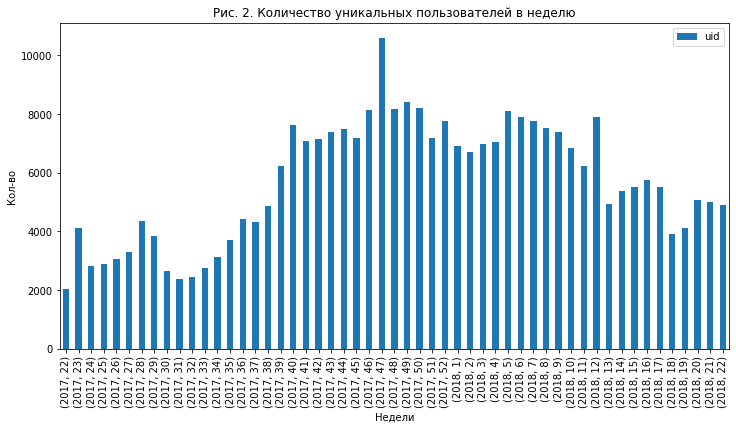

In [11]:
visits_av_week = visits.groupby(['year','week']).agg({'uid': 'nunique'})
visits_wau = int(visits_av_week.mean().round())
print('Среднее количество уникальных сессий в неделю: ', visits_wau)
ax = visits_av_week.plot.bar(figsize=(12,6))
ax.set_title('Рис. 2. Количество уникальных пользователей в неделю')
ax.set(ylabel='Кол-во', xlabel='Недели')
plt.show()

Столбчатный график по неделям более детально повторяет рассматриваемый ниже график по месяцам.

In [12]:
visits_av_month = visits.groupby(['month']).agg({'uid': 'nunique'})
visits_mau = int(visits_av_month.mean().round())
print('Среднее количество уникальных сессий в месяц: ', visits_mau)

Среднее количество уникальных сессий в месяц:  23228


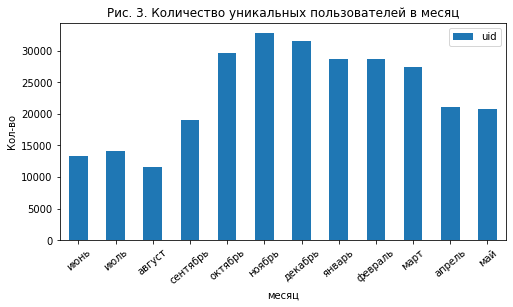

In [13]:
ax = visits_av_month.plot.bar(figsize=(8,4))
ax.set_title('Рис. 3. Количество уникальных пользователей в месяц')
ax.set(ylabel='Кол-во', xlabel='месяц')
#ax.set_xticks()
x = ['июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь', 'январь', 'февраль', 'март', 'апрель', 'май']
ax.set_xticklabels(x,rotation=40)
plt.show()

Мы видим падение посещаемости в августе ("месяц отпусков") и существенный рост в зимние месяцы, связанный, видимо, с новогодними праздниками.

__Из каких рекламных источников приходят пользователи?__

In [14]:
source_x_device = visits.pivot_table(index='source_id', columns='device', values='uid', aggfunc='nunique')

In [15]:
source_x_device.columns = ['desktop_sources', 'touch_sources']

In [16]:
source_x_device['desktop_sources_perc'] = (
    (source_x_device['desktop_sources'] / source_x_device['desktop_sources'].sum()) * 100).round(0)
source_x_device['touch_sources_perc'] = (
    (source_x_device['touch_sources'] / source_x_device['touch_sources'].sum()) * 100).round(0)
source_x_device

,desktop_sources,touch_sources,desktop_sources_perc,touch_sources_perc
source_id,,,,
1,13172,6094,7.0,7.0
2,18257,8609,9.0,10.0
3,57420,18600,29.0,22.0
4,55607,29313,28.0,35.0
5,42053,15375,21.0,19.0
6,5,1,0.0,0.0
7,26,8,0.0,0.0
9,7079,2402,4.0,3.0
10,5763,2381,3.0,3.0


Мы видим схожие цифры по структуре рекламных источников в зависимости от устройства: наибольший трафик приносят источники 3, 4 и 5 (в сумме 78% для компьютеров и 75% для карманных устройств) . Рекламные источники 6 и 7 не приносят сколько-нибудь существенного трафика.

In [17]:
sources_x_uid = visits.groupby('uid').agg({'source_id':'nunique'})
sources_x_uid.columns = ['n_sources']
sources_x_uid['n_sources'].sort_values(ascending=False).head()

uid
1242922364974949363     7
17030528792926543083    7
5603453646174104178     7
8667719997796727944     7
14481163132396345939    7
Name: n_sources, dtype: int64

Мы видим, что пользователи приходят из разных рекламных источников, то есть мы не сможем определить, какой источник принес конкретный заказ.

Посмотрим рекламные источники по дате первого визита пользователя

In [18]:
visits_first_activity = visits.groupby('uid')['start_ts'].min()
visits_first_activity.name = 'first_activity'
visits = visits.join(visits_first_activity, on='uid')

In [19]:
visits_source = visits[visits['start_ts'] == visits['first_activity']]
visits_source

,uid,device,source_id,start_ts,end_ts,date,week,day_of_week,month,year,first_activity
0,16879256277535980062,touch,4,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,51,2,2017-12-01,2017,2017-12-20 17:20:00
1,104060357244891740,desktop,2,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,8,0,2018-02-01,2018,2018-02-19 16:53:00
2,7459035603376831527,touch,5,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,26,5,2017-07-01,2017,2017-07-01 01:54:00
4,9969694820036681168,desktop,3,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,52,2,2017-12-01,2017,2017-12-27 14:06:00
5,16007536194108375387,desktop,5,2017-09-03 21:35:00,2017-09-03 21:36:00,2017-09-03,35,6,2017-09-01,2017,2017-09-03 21:35:00
...,...,...,...,...,...,...,...,...,...,...,...
358524,4558073034499185861,touch,4,2018-01-18 13:38:00,2018-01-18 13:38:00,2018-01-18,3,3,2018-01-01,2018,2018-01-18 13:38:00
358525,11102751930812818282,desktop,3,2017-07-31 12:13:00,2017-07-31 12:31:00,2017-07-31,31,0,2017-07-01,2017,2017-07-31 12:13:00
358526,1321491773734693040,desktop,3,2017-11-01 14:09:00,2017-11-01 14:10:00,2017-11-01,44,2,2017-11-01,2017,2017-11-01 14:09:00
358527,272012551460639309,desktop,4,2018-03-20 15:11:00,2018-03-20 15:25:00,2018-03-20,12,1,2018-03-01,2018,2018-03-20 15:11:00


In [20]:
sources = visits_source.groupby('source_id').agg({'uid':'count'})
sources.columns = ['users_count']
sources['share'] = (sources['users_count'] / sources['users_count'].sum() * 100).round()
sources

,users_count,share
source_id,,
1,9491,4.0
2,17607,8.0
3,66107,29.0
4,72330,32.0
5,49266,22.0
6,2,0.0
7,32,0.0
9,6434,3.0
10,6901,3.0


Определив источник первого захода пользователя, мы снова видим, что наибольший трафик обеспечивают рекламные источники 4, 3 и 5.

__Количество сессий в день__

In [21]:
session_x_user_daily = visits.groupby('date').agg({'uid': ['count', 'nunique']})
session_x_user_daily.columns = ['n_sessions', 'n_users']
session_x_user_daily['sess_x_user'] = session_x_user_daily['n_sessions'] / session_x_user_daily['n_users']
print('Среднее количество сессий в день на одного пользователя: ', (session_x_user_daily['sess_x_user']).mean().round(2))

Среднее количество сессий в день на одного пользователя:  1.08


In [22]:
session_x_user_daily_pivot = visits.pivot_table(index='date', columns='device', values='uid', aggfunc=['count', 'nunique'])
session_x_user_daily_pivot.columns = ['n_sessions_desktop', 'n_sessions_touch', 'n_users_desktop', 'n_users_touch']
session_x_user_daily_pivot['sess_x_user_desktop'] = \
session_x_user_daily_pivot['n_sessions_desktop'] / session_x_user_daily_pivot['n_users_desktop']
session_x_user_daily_pivot['sess_x_user_touch'] = \
session_x_user_daily_pivot['n_sessions_touch'] / session_x_user_daily_pivot['n_users_touch']
print('Среднее количество сессий на пользователя настольных устройств: ', \
      session_x_user_daily_pivot['sess_x_user_desktop'].mean().round(2))
print('Среднее количество сессий на пользователя карманных устойств: ', \
      session_x_user_daily_pivot['sess_x_user_touch'].mean().round(2))

Среднее количество сессий на пользователя настольных устройств:  1.09
Среднее количество сессий на пользователя карманных устойств:  1.05


Как мы заметили ранее, пользователи предпочитают использовать Яндекс-Афиша с настольных устройств и, в среднем, им достаточно одной сессии в день.

__Сколько длится одна сессия__

In [23]:
visits['asl_minutes'] = ((visits['end_ts'] - visits['start_ts']).dt.seconds) / 60

Уберем все строки с продолжительностью сессии менее 1 минуты.

In [24]:
visits = visits[visits['asl_minutes'] >= 1]

In [25]:
visits['asl_minutes'] = visits['asl_minutes'].round(0)

Text(0.5, 1.0, 'Рис. 4. Распределение продолжительности сессий')

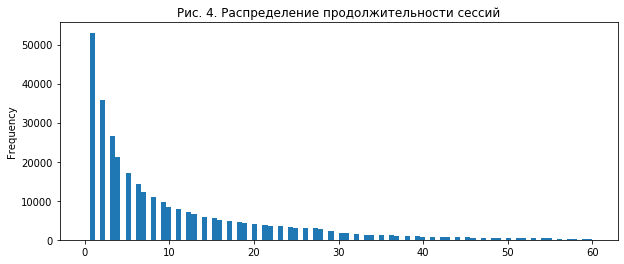

In [26]:
ax = visits['asl_minutes'].plot(kind='hist', bins=100, range=(0,60), figsize=(10,4))
ax.set_title('Рис. 4. Распределение продолжительности сессий')

In [27]:
visits['asl_minutes'].describe()

count    322738.000000
mean         11.942594
std          17.463955
min           1.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1408.000000
Name: asl_minutes, dtype: float64

Учитывая ненормальный характер распределения продолжительности сессий (даже после того, как мы избавились от сессий нулевой продолжительности), в качестве меры центральной тенденции стоит использовать __медиану = 6 мин.__

__Как часто люди возвращаются, или коэффициент удержания__

In [28]:
visits['first_activity_month'] = visits['first_activity'].astype('datetime64[M]')
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')

In [29]:
visits['cohort_lifetime'] = ((visits['activity_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [30]:
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [31]:
initial_users_count.head()

,first_activity_month,cohort_users
0,2017-06-01,11882
12,2017-07-01,11741
23,2017-08-01,9134
33,2017-09-01,15009
42,2017-10-01,23333


In [32]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [33]:
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,11882,11882,1.000000
1,2017-06-01,1,977,11882,0.082225
2,2017-06-01,2,658,11882,0.055378
3,2017-06-01,3,760,11882,0.063962
4,2017-06-01,4,851,11882,0.071621


In [34]:
retention_pivot = \
cohorts.pivot_table(index='first_activity_month',\
                    columns='cohort_lifetime', values='retention',\
                    aggfunc='sum')

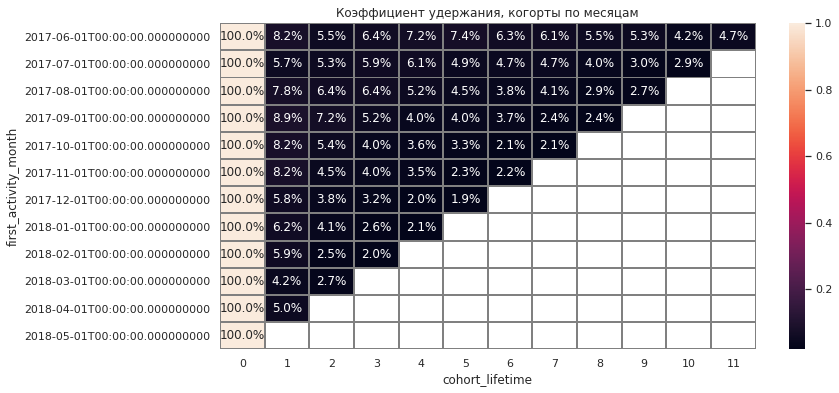

In [35]:
sns.set(style='white')
plt.figure(figsize=(12, 6))
plt.title('Коэффициент удержания, когорты по месяцам')
sns.heatmap(retention_pivot, annot=True, fmt='.1%',\
            linewidths=1, linecolor='grey')

В первый месяц после начала использования приложения (регистрации?) коэффициент удержания пользователей составляет от 4,1 до 8,4%. Затем он становится меньше, причем мы видим, что в 1-й когорте сохраняются довольно высокие показатели (3,8% и выше), тогда как в других когортах он падает до 1,8-2,1% уже на 3-7 месяц.

## Метрики продаж

__Когда люди начинают покупать?__

In [36]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [37]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders = orders[['uid', 'buy_ts', 'revenue']]

In [38]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders.head()

,uid,buy_ts,revenue
0,10329302124590727494,2017-06-01 00:10:00,17.00
1,11627257723692907447,2017-06-01 00:25:00,0.55
2,17903680561304213844,2017-06-01 00:27:00,0.37
3,16109239769442553005,2017-06-01 00:29:00,0.55
4,14200605875248379450,2017-06-01 07:58:00,0.37


In [39]:
orders['buy_ts'].max()

Timestamp('2018-06-01 00:02:00')

При дальнейшем анализе обнаружилось, что в таблицу попал один заказ с датой 01.07.2018. Так как мы рассматриваем период с 01.07.2017 по 31.06.2018, решено удалить эту строку.

In [40]:
orders = orders[orders['buy_ts'] < '2018-06-01']

In [41]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'

In [42]:
orders = orders.merge(first_order_date, on='uid')

In [43]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,uid,buy_ts,revenue,first_order_date,first_order_month,order_month
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01


Предполагаю, что мы анализируем срез данных, то есть те, кто покупают в июне 2017 г., увидели рекламу и зарегистрировались ранее, в те месяцы, по которым у нас нет данных.

Я решила посмотреть доходы по рекламному источнику первого захода пользователя.

In [44]:
ids_source = visits_source.loc[:, ['uid', 'source_id']]

In [45]:
revenues_x_source = pd.merge(orders, ids_source, on='uid')

In [46]:
revenues_x_source_grouped = revenues_x_source.groupby('source_id').agg({'revenue':'sum'})
revenues_x_source_grouped.columns = ['revenues_sum']
revenues_x_source_grouped = revenues_x_source_grouped.merge(sources, on='source_id')
del revenues_x_source_grouped['share']
revenues_x_source_grouped['revenues_share']\
= (revenues_x_source_grouped['revenues_sum'] / revenues_x_source_grouped['revenues_sum'].sum() * 100).round()
revenues_x_source_grouped['revenues_x_user']\
= (revenues_x_source_grouped['revenues_sum'] / revenues_x_source_grouped['users_count']).round(2)
revenues_x_source_grouped

,revenues_sum,users_count,revenues_share,revenues_x_user
source_id,,,,
1,29876.00,9491,12.0,3.15
2,46574.17,17607,18.0,2.65
3,54391.15,66107,22.0,0.82
4,56679.57,72330,22.0,0.78
5,54407.71,49266,22.0,1.10
7,1.22,32,0.0,0.04
9,5666.56,6434,2.0,0.88
10,4457.40,6901,2.0,0.65


Здесь мы, наконец, видим, что нам интересны не только рекламные источники 3 - 5, но и источники 1-2, доход по которым в расчете на привлеченного клиента выше, чем от иточников 3-5, в то время как траты на рекламу в этих источниках ниже.

__Создание когорт для подсчета среднего количества покупок и среднего чека__

In [47]:
sales_x_month = orders.groupby(['first_order_month', 'order_month']).agg({'uid':['count', 'nunique'], 'revenue':'sum'}).reset_index()

In [48]:
sales_x_month.columns = ['first_order_month', 'order_month', 'orders_qty', 'users_qty', 'revenue_sum']

In [49]:
sales_x_month['average_sales'] = (sales_x_month['orders_qty'] / sales_x_month['users_qty']).round(2)
sales_x_month['average_revenue'] = (sales_x_month['revenue_sum'] / sales_x_month['orders_qty']).round(2)
sales_x_month.head()

,first_order_month,order_month,orders_qty,users_qty,revenue_sum,average_sales,average_revenue
0,2017-06-01,2017-06-01,2354,2023,9557.49,1.16,4.06
1,2017-06-01,2017-07-01,177,61,981.82,2.90,5.55
2,2017-06-01,2017-08-01,174,50,885.34,3.48,5.09
3,2017-06-01,2017-09-01,226,54,1931.30,4.19,8.55
4,2017-06-01,2017-10-01,292,88,2068.58,3.32,7.08


__Сколько раз покупают за период__

In [50]:
orders_pivot = sales_x_month.pivot_table(index='first_order_month', columns='order_month',values='average_sales')
orders_pivot

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,2.90,3.48,4.19,3.32,3.25,4.45,3.70,3.66,3.40,2.13,1.62
2017-07-01,NaN,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04
2017-08-01,NaN,NaN,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48
2017-09-01,NaN,NaN,NaN,1.14,1.68,1.61,2.22,1.29,1.70,1.64,1.51,1.42
2017-10-01,NaN,NaN,NaN,NaN,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87
2017-11-01,NaN,NaN,NaN,NaN,NaN,1.18,1.79,1.52,1.99,1.68,1.23,1.65
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,1.15,1.85,1.96,1.85,1.72,1.67
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12,1.96,1.92,1.49,1.73
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12,1.88,1.43,1.79


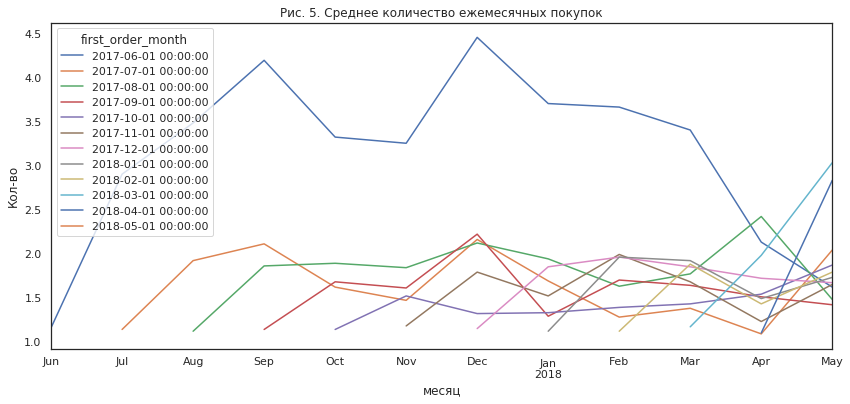

In [51]:
orders_t = orders_pivot.T
ax = orders_t.plot(figsize=(14,6))
ax.set_title('Рис. 5. Среднее количество ежемесячных покупок')
ax.set(ylabel='Кол-во', xlabel='месяц')
plt.show()

У первой когорты самые высокие показатели покупок по месяцам, которые достигают 4,45 заказов в месяц. Количество покупок в других когортах примерно одинаково и варьирует от 1 до 2,42. 

Во всех когортах видна тенденция увеличения количества покупок в сентябре и затем в декабре. Мартовская и апрельская когорты показывавают рост в мае, но не хватает данных по следущим месяцам, чтобы оценить тенденцию.

__Каков средний чек?__

In [52]:
sales_pivot = sales_x_month.pivot_table(index='first_order_month', columns='order_month',values='average_revenue')
sales_pivot

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,NaN,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65
2017-08-01,NaN,NaN,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.70,5.60
2017-09-01,NaN,NaN,NaN,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79
2017-10-01,NaN,NaN,NaN,NaN,4.37,7.41,5.13,5.59,5.10,5.07,4.28,4.01
2017-11-01,NaN,NaN,NaN,NaN,NaN,4.37,4.10,4.47,6.28,4.44,3.73,4.60
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.11,4.23,20.07,26.08,15.95,14.11
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.69,4.44,6.45,7.52,2.71
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.71,4.58,3.45,3.87


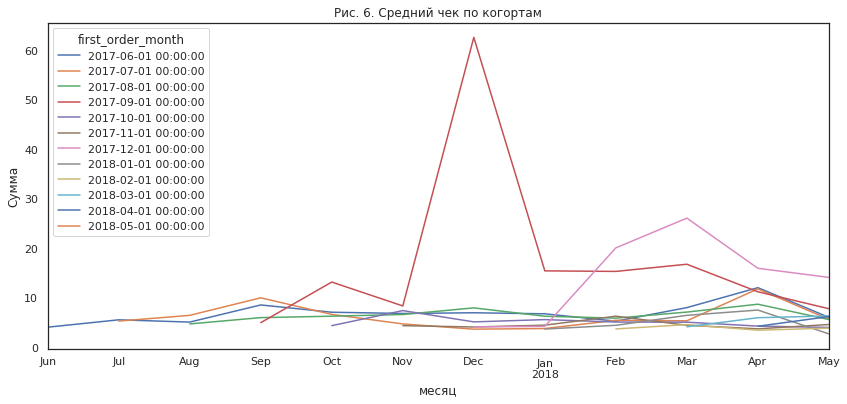

In [53]:
sales_t = sales_pivot.T
ax = sales_t.plot(figsize=(14,6))
ax.set_title('Рис. 6. Средний чек по когортам')
ax.set(ylabel='Сумма', xlabel='месяц')
plt.show()

Величина среднего чека по месяцам меняется в 1,5 - 5 раз внутри когороты и между разными.

Выделяется средний чек 4-ой, сентябрьской когорты, когда, видимо, был совершен большой заказ.

__Сколько денег приносят пользователи (LTV)__

In [54]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [55]:
report = pd.merge(sales_x_month, cohort_sizes, on='first_order_month')

In [56]:
report['age'] = (
    report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,order_month,orders_qty,users_qty,revenue_sum,average_sales,average_revenue,n_buyers,age
0,2017-06-01,2017-06-01,2354,2023,9557.49,1.16,4.06,2023,0
1,2017-06-01,2017-07-01,177,61,981.82,2.90,5.55,2023,1
2,2017-06-01,2017-08-01,174,50,885.34,3.48,5.09,2023,2
3,2017-06-01,2017-09-01,226,54,1931.30,4.19,8.55,2023,3
4,2017-06-01,2017-10-01,292,88,2068.58,3.32,7.08,2023,4


In [57]:
report['ltv'] = report['revenue_sum'] / report['n_buyers']

In [58]:
report_pivot = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round(2)
report_pivot['total_ltv'] = report_pivot.sum(axis=1)
report_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11,total_ltv
first_order_month,,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26,11.88
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN,8.40
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN,8.47
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN,13.43
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN,6.36
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN,6.38
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN,7.65
2018-01-01,4.14,0.29,0.30,0.14,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.93
2018-02-01,4.16,0.28,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.59


Больше всего денег принесла 1-ая когорта, хотя ее помесячные показатели постепенно (и неровно) снижаются (впрочем, это может быть связано с приближением к летним месяцам). Исключительный LTV показала четвертая, сентябрьская, когорта благодаря исключительно большим покупкам в декабре.

<span style="color:blue">Средний LTV за 6 месяцев</span>

In [59]:
report_pivot_6 = report_pivot.iloc[0:6, 0:6]
report_pivot_6


age,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05


In [60]:
sum_6 = 0
for column in report_pivot_6:
    i = report_pivot_6[column].mean() 
    sum_6 += i
print('Сумма дохода (LTV) с одного клиента за 6 месяцев составляет:', sum_6.round(2))

Сумма дохода (LTV) с одного клиента за 6 месяцев составляет: 8.02


## Маркетинг

In [61]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


__Затраты: всего, по источникам, по периодам__

In [62]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [63]:
print("Общая сумма затрат на все рекламные источники за рассматриваемый период: ", int(costs['costs'].sum().round()))

Общая сумма затрат на все рекламные источники за рассматриваемый период:  329132


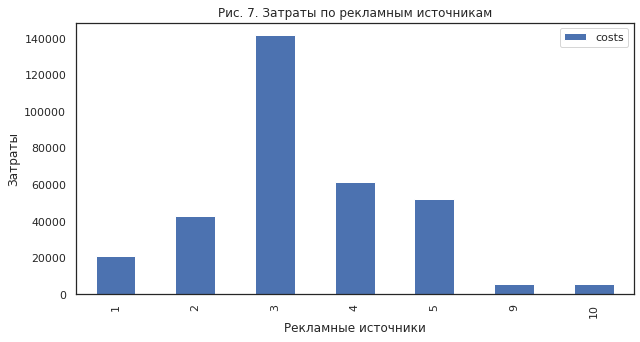

In [64]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
ax = costs_by_source.plot(kind='bar', figsize=(10,5))
ax.set_title('Рис. 7. Затраты по рекламным источникам')
ax.set(ylabel='Затраты', xlabel='Рекламные источники')
plt.show()

На рекламные источники 6-8 не было потрачено средств, и из этих источников, как мы помним, пришло минимальное количество пользователей.

In [65]:
costs['doweek'] = costs['dt'].dt.dayofweek
costs.pivot_table(index='source_id', columns='doweek', values='costs', aggfunc='sum')

doweek,0,1,2,3,4,5,6
source_id,,,,,,,
1,3172.95,3146.33,3151.49,3324.94,3228.78,2390.22,2418.56
2,6604.43,6123.62,6115.99,7038.69,6435.84,5323.50,5163.97
3,19600.61,20760.27,20566.29,23863.59,23195.56,16748.45,16586.86
4,8722.31,8011.79,7023.65,10967.24,10021.48,8285.56,8041.57
5,8226.55,7607.43,7482.96,8504.99,7896.15,6111.21,5927.81
9,863.84,854.09,806.30,878.69,828.59,634.94,651.04
10,951.37,872.22,820.79,908.19,903.37,743.07,623.48


Сделав эту сводную таблицу, я хотела удостовериться, что маркетологи тратят на рекламу больше в четверг и пятницу.

In [66]:
costs['first_order_month'] = costs['dt'].astype('datetime64[M]')

In [67]:
costs_monthly = costs.groupby('first_order_month').agg({'costs':'sum'})

[Text(0, 0.5, 'Затраты'), Text(0.5, 0, 'Месяц')]

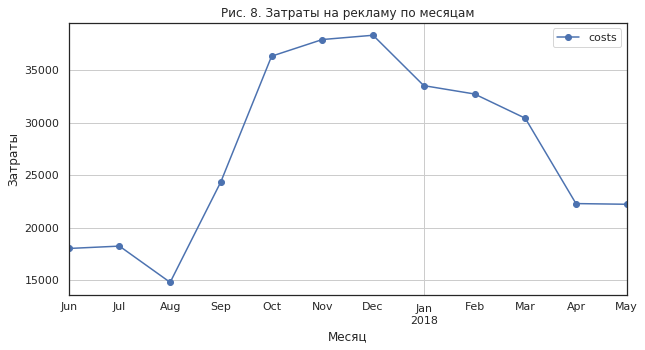

In [68]:
ax = costs_monthly.plot(figsize=(10,5), style='o-',grid=True)
ax.set_title('Рис. 8. Затраты на рекламу по месяцам')
ax.set(xlabel = 'Месяц', ylabel='Затраты')

In [69]:
costs_x_customer = pd.merge(costs_monthly, cohort_sizes, on='first_order_month')

In [70]:
costs_x_customer.head()

,first_order_month,costs,n_buyers
0,2017-06-01,18015.00,2023
1,2017-07-01,18240.59,1923
2,2017-08-01,14790.54,1370
3,2017-09-01,24368.91,2581
4,2017-10-01,36322.88,4340


In [71]:
costs_x_customer['cac'] = (costs_x_customer['costs'] / costs_x_customer['n_buyers']).round(2)

In [72]:
costs_x_customer = costs_x_customer[['first_order_month', 'cac']]

In [73]:
costs_x_customer

,first_order_month,cac
0,2017-06-01,8.91
1,2017-07-01,9.49
2,2017-08-01,10.80
3,2017-09-01,9.44
4,2017-10-01,8.37
5,2017-11-01,9.29
6,2017-12-01,8.74
7,2018-01-01,9.94
8,2018-02-01,8.96
9,2018-03-01,8.61


Самые большие затраты на привлечение клиентов (в среднем на человека) - в третьей когорте. 

Есть тенденция уменьшения расходов на рекламу в последующих когортах.

In [74]:
report = report.merge(costs_x_customer, on='first_order_month')

In [75]:
report['romi'] = report['ltv'] / report['cac']

In [76]:
output = report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

In [77]:
output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.58,0.63,0.74,0.86,0.94,1.04,1.11,1.17,1.24,1.30,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.83,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.24,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.50,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Первая когорта окупилась к концу 6-го месяца, третья - к концу 4-го (но это, видимо, исключительный случай), остальные пока не окупились.

Обратим внимание, что на когорты "январь 2018" и "апрель 2018" было потрачено больше денег (чем на когорты до них и после), но их показатели окупаемости ниже (или не выше, в случае с апрелем), чем у других когорт того же возраста.

In [78]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.540754
1     0.581931
2     0.630987
3     0.719658
4     0.782825
5     0.859750
6     0.896631
7     0.969732
8     1.053600
9     0.964026
10    1.094088
11    1.333247
dtype: float64

В среднем когорты окупаются после 10-го месяца, но, по всей видимости, на на продажи (ergo окупаемость) сильно влияет сезонность.

## Заключение

1. В целом мы видим, что пользователи предпочитают заходить на Яндекс-Афишу с настольных устройств, хотя в выходные растет количество заходов с карманных устройств (рис. 1).

2. Основные источники трафика - 3, 4, 5, в сумме они дают более 2/3 трафика независимо от типа устройств.

3. На эти же источники приходится и бóльшая часть рекламного бюджета (рис. 7). Тем не менее, пользователи из источников 1 и 2 приносят высокий доход, так что следует увеличить рекламный бюджет для этих источников.

4. При этом важно усилить рекламу по четвергам-пятницам - пиковые дни по заходам, а по месяцам - в октябре-декабре (см. рис. 3). В рабочие дни необходимо усилить рекламу на настольных устройствах, а в выходные - уделить внимание карманным.